# Úkol č. 1 - vizualizace dat a web scraping (do 11. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.psp.cz/sqw/hlasovani.sqw?o=8 týkající hlasování současné poslanecké sněmovny, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Data

 * Měli byste stáhnout data ze všech hlasování současné poslanecké sněmovny (tj. od voleb v roce 2017) a to až na úroveň jednotlivých poslanců. 
 * Data by měla obsahovat i stručný popis toho, o jaké hlasování šlo.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data a uložte je do vhodného formátu, který se Vám bude dále dobře zpracovávat. 
  * **I když nemusíte mít sněmovnu rádi, snažte se nezahltit server a mezi požadavky na stránku mějte alespoň vteřinu mezeru.**
  * V druhé části Vašeho Jupyter notebooku pracujte se staženými daty v souborech, které jsou výsledkem Vašeho stahovacího skriptu (aby opravující nemusel spouštět stahování z webu).
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Odchody a přeběhnutí poslanců mezi jednotlivými stranami.
    * Jakou mají jednotliví poslanci docházku (účast na hlasování) a jak jsou na tom s docházkou strany jako celek.
    * Jak často spolu jednotlivé strany hlasují ve shodě a jak často hlasují odlišně.
    * Jak jsou poslanci jednotlivých stran jednotní v hlasování (jak často hlasují stejně, kdo jsou největší rebelové).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * Ve vizualizacích a grafech nějak zachyťte časový vývoj (např. jak se mění docházka, shoda mezi stranami atp.).
  * Najděte jednotlivé poslance, kteří se nejvíce shodují při svém hlasování či kteří mají co nejpodobnější účast na hlasování.
  * Zkuste rozlišit v datech důležitá hlasování a zpracujte vizualizace (také) pro ně.
  * Zkuste najít hlasování, kde poslanci hlasovali nejvíce jinak, než obvykle.
  
## Tipy a triky
  * Balíčky iportujte na začátku notebooku (příp. na začátku scrapovací a pak na začátku vizualizační části).
  * Využívejte markdown buňky (jako je ta, ve které je tento text) a naspisy, abyste usnadnily orientaci opravující(mu).
  * Pečlivě si vybírejte grafy a vizualizace, aby co nejlépe vyjádřily to, co vyjádřit chcete. Doporučuji projít si pro inspiraci alespoň galerie balíčků `matplotlib` a `seaborn`.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook (příp. doplněn skripty), ale i soubor(y) se staženými daty (ať opravující nemusí stahovat data).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [2]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('votings.csv', sep=';')

In [4]:
df = data

In [5]:
voting_names = df.iloc[:, 0]
votes = df.iloc[:, range(1, 213)]
parties = df.iloc[:, range(214, 426)]
parties_list = ['ANO', 'ODS', 'Piráti', 'SPD', 'ČSSD', 'KSČM', 'KDU-ČSL', 'TOP09', 'STAN', 'Nezařaz']

In [6]:
voting_names_arr = voting_names.tolist()
voting_indexes = []
for ind, vot in enumerate(voting_names_arr):
    voting_indexes.append(ind)

In [7]:
politicians = votes.columns.tolist()
politician_attendances = []
number_of_votings = 6881

In [8]:
# odchody a prebehnuti mezi stranami - stav prvni vs. posledni hlasovani
parties_first_voting = parties.iloc[0, :].tolist()
parties_last_voting = parties.iloc[6880, :].tolist()
first_last = pd.DataFrame([parties_first_voting, parties_last_voting])
first_last_t = first_last.transpose()
print(str(len(parties_last_voting)))

212


In [13]:
fl = px.parallel_categories(first_last_t, dimensions=[0, 1],
                            labels={'0':'Stav sněmovny při prvním hlasování', '1': 'Stav sněmovny při posledním hlasování'})
fl.show()

In [9]:
turncoats = {'Jméno': [], 'Příslušnost při 1. hlasování':[], 'Příslušnosti při posledním holasování':[]}
df_turncoats = pd.DataFrame(turncoats)

In [12]:
party_leaves = {'ANO': 0, 'ODS': 0, 'Piráti': 0, 'SPD': 0, 'ČSSD': 0, 'KSČM': 0, 'KDU-ČSL': 0, 'TOP09': 0, 'STAN': 0, 'Nezařaz': 0, '-': 0}
party_joins = {'ANO': 0, 'ODS': 0, 'Piráti': 0, 'SPD': 0, 'ČSSD': 0, 'KSČM': 0, 'KDU-ČSL': 0, 'TOP09': 0, 'STAN': 0, 'Nezařaz': 0, '-': 0}

for index, affiliation in enumerate(parties_first_voting):
    if parties_first_voting[index] != parties_last_voting[index]:
        party_leaves[parties_first_voting[index]] += 1
        party_joins[parties_last_voting[index]] += 1
        new_turncoat = {'Jméno': politicians[index], 'Příslušnost při 1. hlasování': parties_first_voting[index], 'Příslušnosti při posledním holasování':parties_last_voting[index]}
        df_turncoats = df_turncoats.append(new_turncoat, ignore_index=True)
        
party_leaves.pop('-')
party_joins.pop('-')
df_turncoats

Jméno Příslušnost při 1. hlasování  \
0               Bohuslav Sobotka                         ČSSD   
1                        Dan Ťok                          ANO   
2                  Eva Matyášová                            -   
3              František Navrkal                            -   
4                 Irena Blažková                            -   
5                Ivana Nevludová                          SPD   
6                   Iva Kalátová                            -   
7               Jaroslav Foldyna                         ČSSD   
8                   Jiří Hlavatý                          ANO   
9                  Lubomír Volný                          SPD   
10                  Marian Bojko                          SPD   
11               Marie Pěnčíková                            -   
12                   Martin Půta                         STAN   
13             Martin Stropnický                          ANO   
14                 Mikuláš Peksa                       Piráti   
15                Milan Chovanec                         ČSSD   
16                    Milan Pour                            -   
17             Monika Červíčková                            -   
18                  Ondřej Babka                            -   
19                    Petr Bendl                            -   
20                    Petr Pávek                            -   
21                  Petr Venhoda                            -   
22                    Petr Vrána                          ANO   
23                  Radka Maxová                          ANO   
24                Robert Pelikán                          ANO   
25                 Roman Sklenák                            -   
26                Tereza Hyťhová                          SPD   
27           Veronika Vrecionová                          ODS   
28              Vladimír Koníček                         KSČM   
29                  Václav Klaus                          ODS   
30                 Václav Votava                            -   
31  Zuzana Majerová Zahradníková                          ODS   

   Příslušnosti při posledním holasování  
0                                      -  
1                                      -  
2                                    ANO  
3                                 Piráti  
4                                    ANO  
5                                Nezařaz  
6                                    ANO  
7                                    SPD  
8                                      -  
9                                Nezařaz  
10                               Nezařaz  
11                                  KSČM  
12                                     -  
13                                     -  
14                                     -  
15                                     -  
16                                   ANO  
17                                   ANO  
18                                   ANO  
19                                   ODS  
20                                  STAN  
21                                   ANO  
22                                     -  
23                                     -  
24                                     -  
25                                  ČSSD  
26                               Nezařaz  
27                                     -  
28                                     -  
29                               Nezařaz  
30                                  ČSSD  
31                               Nezařaz

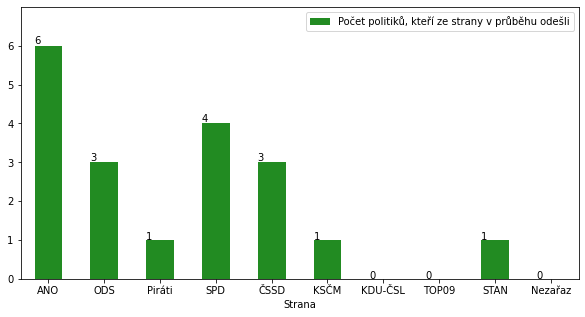

In [14]:
# pocty politiku, kteri z jednotlivych stran odesli
y_values = [0, 1, 2, 3, 4, 5, 6]
chart1_df = pd.DataFrame({'Strana':parties_list, 'Počet politiků, kteří ze strany v průběhu odešli':list(party_leaves.values())})
chart1 = chart1_df.plot.bar(x='Strana', y='Počet politiků, kteří ze strany v průběhu odešli', color = 'forestgreen', rot=0, ylim=(0,7), figsize = (10, 5), yticks = y_values)
for p in chart1.patches:
    chart1.annotate(str(round(p.get_height(), 1)), (p.get_x(), p.get_height() * 1.01))

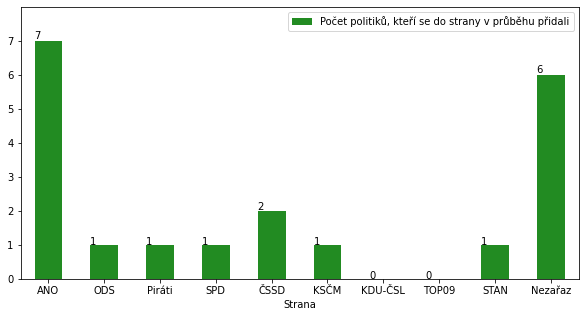

In [15]:
# počty politiků, kteří se do strany v průběhu přidali
y_values = [0, 1, 2, 3, 4, 5, 6, 7]
chart1_df = pd.DataFrame({'Strana':parties_list, 'Počet politiků, kteří se do strany v průběhu přidali':list(party_joins.values())})
chart1 = chart1_df.plot.bar(x='Strana', y='Počet politiků, kteří se do strany v průběhu přidali', color = 'forestgreen', rot=0, ylim=(0,8), figsize = (10, 5), yticks = y_values)
for p in chart1.patches:
    chart1.annotate(str(round(p.get_height(), 1)), (p.get_x(), p.get_height() * 1.01))

In [16]:
# dochazka politiku - vypocet
politician_attendances = []
for index_p, politician in enumerate(politicians):
    missing = 0
    refrained = 0
    yes = 0
    no = 0
    not_registered = 0
    not_in_mandate = 0
    for index, row in votes.iterrows():
        if row[index_p] == 'M':
            missing += 1
        elif row[index_p] == 'Z':
            refrained += 1
        elif row[index_p] == 'A':
            yes += 1
        elif row[index_p] == 'N':
            no += 1
        elif row[index_p] == '0':
            not_registered += 1
        else:
            not_in_mandate += 1
    if number_of_votings - not_in_mandate != 0:
        attendance = 100*(number_of_votings - not_in_mandate - not_registered - missing)/(number_of_votings - not_in_mandate)
    else:
        attendance = 0
    politician_attendances.append(attendance)

In [17]:
class Politician:
    def __init__ (self, name, attendance):
        self.name = name
        self.attendance = attendance

p_a = []
for index, politician in enumerate(politicians):
    if politician_attendances[index] != 0:
        p_a.append(Politician(politician, politician_attendances[index]))
p_a.sort(key= lambda x: x.attendance)

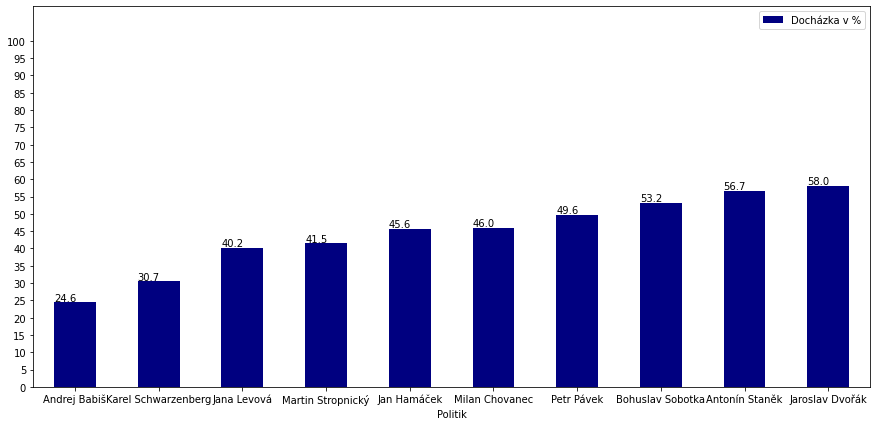

In [18]:
# 10 nejnizsich dochazek
worst_names = []
worst_attendances = []
for i in range (0, 10):
    worst_names.append(p_a[i].name)
    worst_attendances.append(p_a[i].attendance)

y_values = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
chart1_df = pd.DataFrame({'Politik':worst_names, 'Docházka v %':worst_attendances})
chart1 = chart1_df.plot.bar(x='Politik', y='Docházka v %', color = 'navy', rot=0, ylim=(0,110), figsize = (15, 7), yticks = y_values)
for p in chart1.patches:
    chart1.annotate(str(round(p.get_height(), 1)), (p.get_x(), p.get_height() * 1.01))


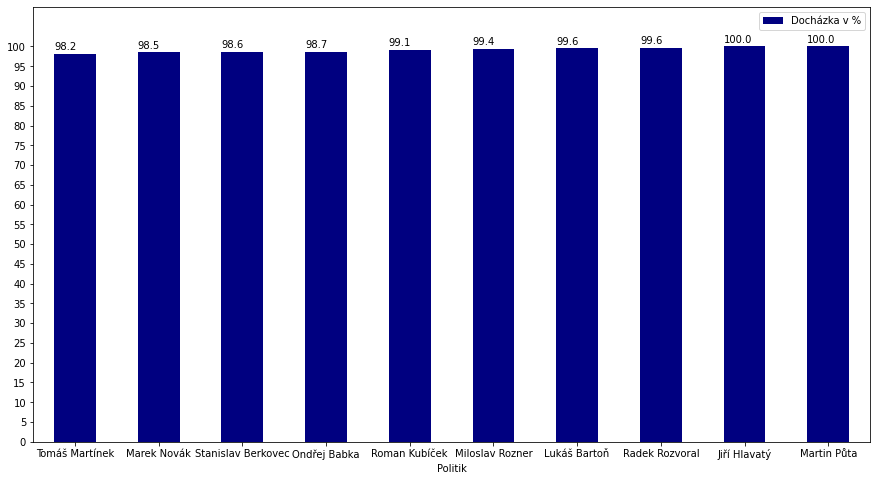

In [19]:
# 10 nejvyssich dochazek
best_names = []
best_attendances = []
for i in range (len(p_a) - 10, len(p_a)):
    best_names.append(p_a[i].name)
    best_attendances.append(p_a[i].attendance)

y_values = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
chart1_df = pd.DataFrame({'Politik':best_names, 'Docházka v %':best_attendances})
chart1 = chart1_df.plot.bar(x='Politik', y='Docházka v %', color = 'navy', rot=0, ylim=(0,110), figsize = (15, 8), yticks = y_values)
for p in chart1.patches:
    chart1.annotate(str(round(p.get_height(), 1)), (p.get_x(), p.get_height() * 1.01))


In [20]:
# prumerna dochazka strany - prislusnost poslancu k poslednimu hlasovani
# tedy dochazka soucasne pusobicich poslancu
class Affiliation:
    def __init__(self, name):
        self.indexes = []
        self.name = name
        self.attendance = 0
        
parties_last_voting = parties.iloc[6880, :].tolist()
affiliation_indexes = []
for i in parties_list:
    affiliation_indexes.append(Affiliation(i))
for p in affiliation_indexes:
    for i, v in enumerate(parties_last_voting):
        if v == p.name:
            p.indexes.append(i)
for p in affiliation_indexes:
    for i, a in enumerate(politician_attendances):
        if i in p.indexes:
            p.attendance += a
    p.attendance = p.attendance/len(p.indexes)
p_attendances = []
for p in affiliation_indexes:
    p_attendances.append(p.attendance)

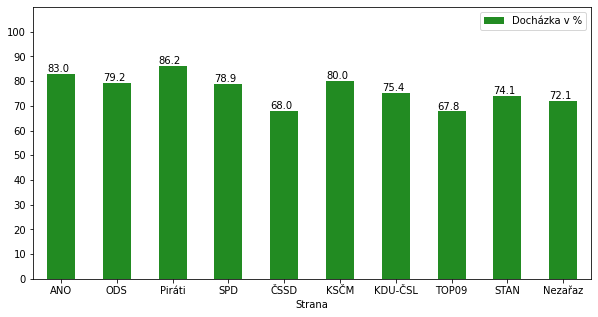

In [21]:
# prumerna dochazka strany - prislusnost poslancu k poslednimu hlasovani
y_values = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
chart1_df = pd.DataFrame({'Strana':parties_list, 'Docházka v %':p_attendances})
chart1 = chart1_df.plot.bar(x='Strana', y='Docházka v %', color = 'forestgreen', rot=0, ylim=(0,110), figsize = (10, 5), yticks = y_values)
for p in chart1.patches:
    chart1.annotate(str(round(p.get_height(), 1)), (p.get_x(), p.get_height() * 1.01))

In [22]:
# pomocna trida pro vypocet shody v hlasovani stran
class Party:
    def __init__(self):
        self.indexes = []
        self.votes = [0, 0, 0]
        self.total = 0
        self.agreement = []
        self.agreement_most_voted = []
    def set_zero(self):
        self.indexes.clear()
        self.votes = [0, 0, 0]
        self.total = 0

ods = Party()
ano = Party()
pirati = Party()
spd = Party()
cssd = Party()
kscm = Party()
kducsl =  Party()
top09 = Party()
stan = Party()
nezaraz = Party()
party_list = [ods, ano, pirati, spd, cssd, kscm, kducsl, top09, stan, nezaraz]


In [23]:
# shody v hlasovani uvnitr jednotlivych stran
for p in party_list:
    p.agreement.clear()
    p.agreement_most_voted.clear()

for index, row in parties.iterrows():
    
    for one_p in party_list:
        one_p.set_zero()
        
    for index_p, party in enumerate(parties):
        if row[index_p] == 'ODS':
            party_list[0].indexes.append(index_p)
        elif row[index_p] == 'ANO':
            party_list[1].indexes.append(index_p)
        elif row[index_p] == 'Piráti':
            party_list[2].indexes.append(index_p)
        elif row[index_p] == 'SPD':
            party_list[3].indexes.append(index_p)
        elif row[index_p] == 'ČSSD':
            party_list[4].indexes.append(index_p)
        elif row[index_p] == 'KSČM':
            party_list[5].indexes.append(index_p)
        elif row[index_p] == 'KDU-ČSL':
            party_list[6].indexes.append(index_p)
        elif row[index_p] == 'TOP09':
            party_list[7].indexes.append(index_p)
        elif row[index_p] == 'STAN':
            party_list[8].indexes.append(index_p)
        elif row[index_p] == 'Nezařaz':
            party_list[9].indexes.append(index_p)
    columns = list(votes)
    row2 = votes.loc[index, :]
    for one_p in party_list:
        for i, name in enumerate(columns):
            if i in one_p.indexes:
                if row2[i] == 'A':
                    one_p.votes[0] += 1
                    one_p.total += 1
                elif row2[i] == 'N':
                    one_p.votes[1] += 1
                    one_p.total += 1
                elif row2[i] == 'Z':
                    one_p.votes[2] += 1
                    one_p.total += 1
        max_agr = max(one_p.votes)
        if max_agr == one_p.votes[0]:
            one_p.agreement_most_voted.append(0)
        elif max_agr == one_p.votes[1]:
            one_p.agreement_most_voted.append(1)
        else:
            one_p.agreement_most_voted.append(2)
        if one_p.total != 0:
            one_p.agreement.append(100*(max_agr/one_p.total))
        else:
            one_p.agreement.append(1)

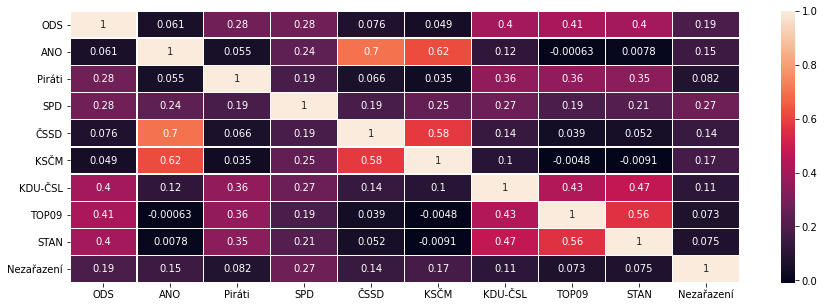

In [24]:
# shody v hlasovani napric stranami, zdrzeni se hlasovani se pocita zvlast
chart2_df = pd.DataFrame({'ODS':party_list[0].agreement_most_voted, 'ANO':party_list[1].agreement_most_voted, 'Piráti':party_list[2].agreement_most_voted, 'SPD':party_list[3].agreement_most_voted,
                         'ČSSD':party_list[4].agreement_most_voted, 'KSČM':party_list[5].agreement_most_voted, 'KDU-ČSL':party_list[6].agreement_most_voted, 'TOP09':party_list[7].agreement_most_voted,
                         'STAN':party_list[8].agreement_most_voted, 'Nezařazení':party_list[9].agreement_most_voted})
correlation_matrix = chart2_df.corr()
plt.figure(figsize = (15,5))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.show()


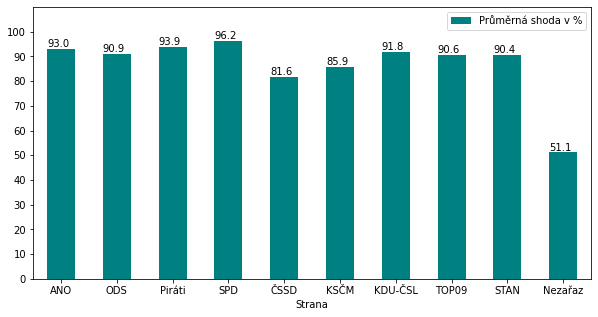

In [25]:
# celkova prumerna shoda uvnitr strany:
parties_list = ['ANO', 'ODS', 'Piráti', 'SPD', 'ČSSD', 'KSČM', 'KDU-ČSL', 'TOP09', 'STAN', 'Nezařaz']
total_agreements = []
for one_p in party_list:
    total_a = 0
    for a in one_p.agreement:
        total_a += a
    if len(one_p.agreement) != 0:
        total_a = total_a/ len(one_p.agreement)
    else:
        total_a = 0
    total_agreements.append(total_a)
y_values = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
chart1_df = pd.DataFrame({'Strana':parties_list, 'Průměrná shoda v %':total_agreements})
chart1 = chart1_df.plot.bar(x='Strana', y='Průměrná shoda v %', color = 'teal', rot=0, ylim=(0,110), figsize = (10, 5), yticks = y_values)
for p in chart1.patches:
    chart1.annotate(str(round(p.get_height(), 1)), (p.get_x(), p.get_height() * 1.01))

In [26]:
# shoda napric celou poslaneckou snemovnou
total_agreement = []
for index, row in votes.iterrows():
    total_votes = [0, 0, 0]
    total = 0
    columns = list(votes)
    row2 = votes.loc[index, :]
    for i, name in enumerate(columns):
            if row2[i] == 'A':
                total_votes[0] += 1
                total += 1
            elif row2[i] == 'N':
                total_votes[1] += 1
                total += 1
            elif row2[i] == 'Z':
                total_votes[2] += 1
                total += 1
    max_agr = max(total_votes)
    if total != 0:
        total_agreement.append(100*(max_agr/total))
    else:
        total_agreement.append(1)

C:\Users\User\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



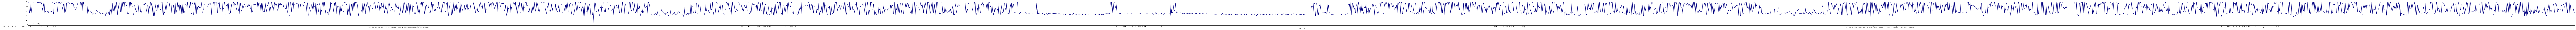

In [27]:
# shoda napric celou poslaneckou snemovnou
y_values = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
chart2_df = pd.DataFrame({'Hlasování':voting_names_arr, 'Shoda v PS':total_agreement})
chart2_df.plot(kind='line', x='Hlasování', y='Shoda v PS', color = 'navy', figsize = (400, 4))
plt.margins(x=0)
plt.show()
